# Contenido.
    1. Introducción.
    2. Importación de datos.
    3. Exploración de datos.
    4. Transformación de datos.
    5. Agregación de datos.
    6. Selección de datos.
    7. Lectura de graficos.
    8. Prueba de hipótesis.
    9. Conclusión   

## Introducción.

En este proyecto vamos a trabajar con los datos de una empresa nueva de viajes en Chicago que se llama Zuber, nuestro trabajo es encontrar los patrones en la información disponible, comprender cual es la preferencia de los pasajeros y el impacto de los factores externos en los viajes.
vamos a utilizar información proveniente de la web, y analizaremos datos de los competidores.
Reliazaremos una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

## Importación de datos.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
company_trips = pd.read_csv('/datasets/project_sql_result_01.csv')

In [3]:
average_dropoff = pd.read_csv('/datasets/project_sql_result_04.csv')

In [4]:
start_weather = pd.read_csv('/datasets/project_sql_result_07.csv')

## Exploración de datos.

In [5]:
# vamos a ver la información de nuestros dataframe.
company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
# muestra general de datos.
company_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


- `company_name` - Nombre de la empresa de taxis.
- `trips_amount` - El número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

In [7]:
# Revisando si tenemos valores duplicados.
company_trips.duplicated().sum()

0

- Nuestra tabla consta con solo dos columnas y 64 filas.
- Logramos ver que no tenemos valores ausentes ya que las columnas tienen la misma cantidad de información que las filas de la tabla.
- No contamos con valores duplicados.

In [8]:
# Revisando la información de nuestra segunda tabla.
average_dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [9]:
# Información general del dataframe.
average_dropoff.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


- `dropoff_location_name` - Barrios de Chicago donde finalizaron los viajes.
- `avarege_trips` - El promedio de viajes que terminaron en cada barrio en noviembre de 2017.

In [10]:
# Revisando si tenemos valores duplicados.
average_dropoff.duplicated().sum()

0

- Nuestra tabla consta con solo dos columnas y 94 filas.
- Logramos ver que no tenemos valores ausentes ya que las columnas tienen la misma cantidad de información que las filas de la tabla.
- No contamos con valores duplicados.


In [11]:
# Revisemos la información de nuestra tercer tabla.
start_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [12]:
# Muestra de datos generales.
start_weather.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


- `start_ts` - Fecha de hora de recogida. 
- `weather_conditions` - Condiciones climátricas en el momento en el que comenzó el viaje.
- `duration_seconds` - Duración del viaje en segundos.

In [13]:
start_weather.duplicated().sum()

197

- Nuestra tabla consta con solo tres columnas y 1068 filas.
- Logramos ver que no tenemos valores ausentes ya que las columnas tienen la misma cantidad de información que las filas de la tabla.
- En esta tabla si contamos con 197 valores duplicados.
- También logramos notar que nuestra columna start_ts esta formato object siendo esta una fecha.


## Transfomación de datos.

In [14]:
# Eliminaremos los valores ausentes de nuestra tercer tabla.
start_weather = start_weather.drop_duplicates()

In [15]:
# Verificando si fueron eliminados los valores ausentes.
start_weather.duplicated().sum()

0

In [16]:
# Transformando la columna de object a datetime64.
start_weather['start_ts'] = pd.to_datetime(start_weather['start_ts'], format = '%Y-%m-%d')
start_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.2+ KB


## Agregación de datos.


In [17]:
# agregaremos una columna con el dia de la semana a nuestra tabla.
start_weather['day_week'] = start_weather['start_ts'].dt.day_name()
start_weather.head()

,start_ts,weather_conditions,duration_seconds,day_week
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday


## Selección de datos.

In [18]:
# Vamos a selecionar los 10 principales barrios con mayor promedio de finalización.
average_dropoff = average_dropoff.sort_values(by= 'average_trips', ascending=False)[0:10]
average_dropoff

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [19]:
# Selecionaremos las diez compañias con mas viajes realizados.
company_trips = company_trips.sort_values(by= 'trips_amount', ascending=False)[0:10]
company_trips

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


## Lectura de Graficos.

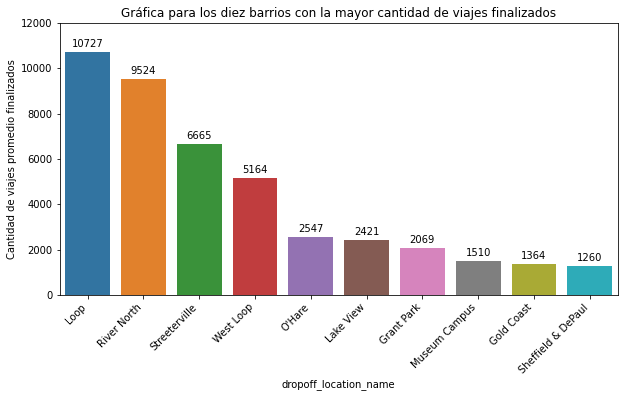

In [20]:
# Creamos el gráfico de barras para mostrar los principales barrios donde finalizaron los viajes
f,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=average_dropoff,x='dropoff_location_name',y='average_trips')
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 3
    label = "{:.0f}".format(y_value)
    ax.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va='bottom')              
plt.xticks(rotation=45,ha='right')
plt.ylim(0,12000)
plt.ylabel('Cantidad de viajes promedio finalizados')
plt.title('Gráfica para los diez barrios con la mayor cantidad de viajes finalizados')
plt.show()

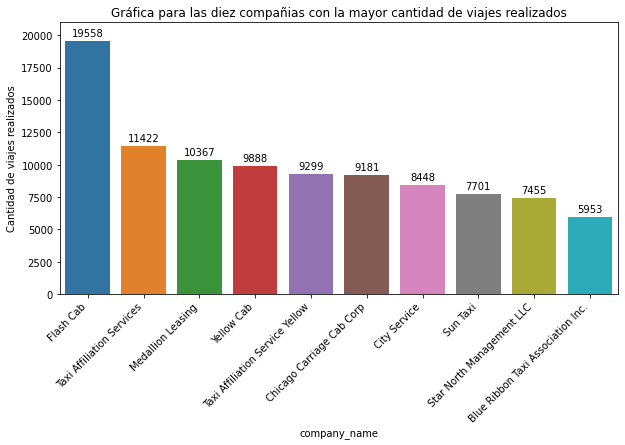

In [21]:
# Creamos el gráfico de barras para mostrar los viajes realizados por cada compañia
f,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=company_trips,x='company_name',y='trips_amount')
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 3
    label = "{:.0f}".format(y_value)
    ax.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va='bottom')              
plt.xticks(rotation=45,ha='right')
plt.ylim(0,21000)
plt.ylabel('Cantidad de viajes realizados')
plt.title('Gráfica para las diez compañias con la mayor cantidad de viajes realizados')
plt.show()

## Prueba de hipótesis.

In [22]:
# Vmos a mostrar los valores por cada una de las condiciones del clima.
start_weather['weather_conditions'].value_counts()

Good    723
Bad     148
Name: weather_conditions, dtype: int64

In [23]:
# Realizaremos un query para seraparar los datos para nuestra hipotesis.
weather_good = start_weather.query('weather_conditions == "Good"')['duration_seconds']
weather_bad = start_weather.query('weather_conditions == "Bad"')['duration_seconds']

- Realizaremos una prueba de Levene con el alpha en 0.05 para asi poder obtener la varianza y definir que parametro usaremos para equal_var

La prueba de 'Levene' sirve para probar:

- **H0:** Las varianzas de dos poblaciones son iguales
- **H1:** Las varianzas de las dos poblaciones no son iguales

In [24]:
# Prueba de 'Levene' sobre las varianzas de las muestras
alpha = 0.05
results = st.levene(weather_good, weather_bad)
print(f'La varianza de un buen tiempo es: {np.var(weather_good)}',end='\n')
print(f'La varianza de un mal tiempo es: {np.var(weather_bad)}',end='\n\n')
print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula de que las varianzas son iguales")
else:
    print("No rechazamos la hipótesis nula")

La varianza de un buen tiempo es: 597389.5417434273
La varianza de un mal tiempo es: 561003.0958728999

p-value:  0.9806770360671218
No rechazamos la hipótesis nula


- Ya que no fue rechazada la hipotesis nula vamos a usar TRUE para el parametro equal_var, en nuestra prueba de el t de Student.

- **H0:**  La duración promedio de los viajes desde el Loop hasta el aeropuerto internacional O´Hare cambia los sábados lluviosos. 
- **H1:**  La duración promedio de los viajes desde el Loop hasta el aeropuerto internacional O´Hare no cambia los sábados lluviosos.

In [25]:
# Prueba 't de Student' para las medias de las muestras
alpha = 0.05
results = st.ttest_ind(weather_good, weather_bad, equal_var=True)
print(f'La media de un buen tiempo es: {np.mean(weather_good)}',end='\n')
print(f'La media de un mal tiempo es: {np.mean(weather_bad)}',end='\n\n')
print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula") 

La media de un buen tiempo es: 2032.253112033195
La media de un mal tiempo es: 2409.2297297297296

p-value:  7.397770692813604e-08
Rechazamos la hipótesis nula


## Conclusión.

- Según nuestro estudio en el proyecto logramos identificar que los barrios con mayor finalización de viajes son los mas cercanos a Chicago tales como: 
1.   Loop.
2.	River North.
3.	Streeterville.
4.	West Loop.
- Mientras que los barrios con menos viajes finalizados son:
1.	Museum Campus.
2.	Gold Coast.
3.  Sheffield & DePaul.

- Las compañias con la mayor cantidad de viajes realizados fueron:
1.  Flash Cab
2.	Taxi Affiliation Services
3.	Medallion Leasing
4.	Yellow Cab
- Y las compañias con menos viajes realizados fueron:
1.  Sun Taxi.
2.  Star North Management LLC
3.  Blue Ribbon Taxi Association inc

- Realizamos una prueba de levene para verificar las varianzas de las poblaciones y logramos concluir que son diferentes y por ende el parametro equal_var lo clasificamos en False, decidi colocar el parametro de alpha en 0.05 por ser el mas ido - Según nuestras hipotesis la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional de O'Hare no es la misma en los días sábados lluviosos.

**Alex V. Segovia R**
- Gracias
- 14/04/2023